In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# function
_w = [1.0, 1.0]
f = lambda x: _w[0]*np.cos(np.pi * x) + _w[1]*np.sin(np.pi*x)

In [3]:
x_train = np.linspace(-1.5, 1.5, 100)
fx = f(x_train)

In [5]:
np.random.seed(320)
y_train = fx + (2*np.random.rand(len(x_train))-1)

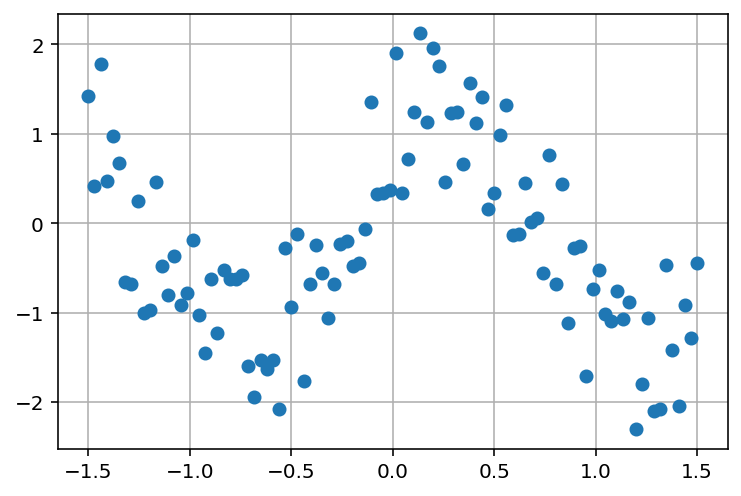

In [6]:
plt.plot(x_train, y_train, 'o')
plt.grid()
plt.show()

In [8]:
W = tf.Variable(np.array([[0.5, 0.5]]), dtype=tf.float32)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

loss = tf.reduce_mean(tf.square(tf.matmul(W, x) - y))

lr = 0.01
MaxEpochs = 500
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

feature_train = np.array([[np.cos(np.pi * xval), np.sin(np.pi * xval)] for xval in x_train]).T

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpochs):
        if epoch % 50 == 0:
            curr_w, curr_loss = sess.run([W, loss], feed_dict={x: feature_train, y: y_train})
            print(epoch, curr_w, curr_loss)
        sess.run(train, feed_dict={x: feature_train, y: y_train})
        
    w_final = sess.run(W)
    print(w_final)

0 [[0.5 0.5]] 0.49164987
50 [[0.6447966 0.6860094]] 0.37874794
100 [[0.7328432 0.7979792]] 0.33752266
150 [[0.78638136 0.86538017]] 0.32246816
200 [[0.8189362  0.90595293]] 0.31697002
250 [[0.83873194 0.93037593]] 0.31496188
300 [[0.85076904 0.9450777 ]] 0.31422833
350 [[0.85808843 0.95392746]] 0.31396028
400 [[0.86253923 0.95925474]] 0.3138624
450 [[0.8652456 0.9624615]] 0.31382665
[[0.8668912  0.96439177]]


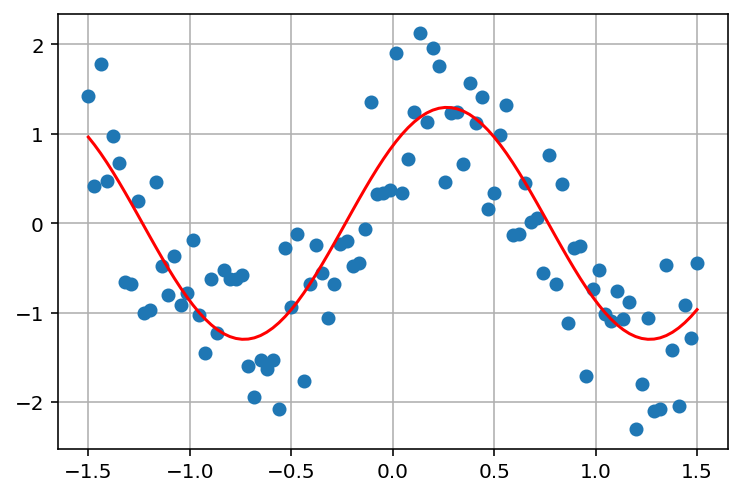

In [9]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, np.dot(w_final, feature_train).flatten(), 'r-')
plt.grid()
plt.show()